In [18]:
import numpy as np
import matplotlib.pyplot as plt

from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit, transpile
from qiskit_aer import AerSimulator

from LogicalQ.LogicalGeneral import LogicalCircuitGeneral
from LogicalQ.Library.QECCs import five_qubit_code, steane_code
from LogicalQ.NoiseModel import construct_noise_model_QuantinuumH1_1
from LogicalQ.Experiments import execute_circuits

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Demonstrating error correction

In [19]:
outputs = []
for i in range(6):
    five_qubit_circ = LogicalCircuitGeneral(2, **five_qubit_code)
    five_qubit_circ.encode(0,1, initial_states=[0,1])
    if i < 5: #Runs the last sim without an error for thorough testing
        five_qubit_circ.add_error(0,i,'X')
        five_qubit_circ.add_error(1,i,'X')
    five_qubit_circ.append_qec_cycle([0,1])
    five_qubit_circ.measure([0,1], [0,1])
    simulator = AerSimulator(method='stabilizer')
    result = execute_circuits(five_qubit_circ, backend=simulator, shots=1, memory=True)[0]
    outputs.append(result.get_memory())

#The leftmost numbers in the output are the logical measurements. Should all be '10'
for o in outputs:
    print(o)

['10 10010 11 1000 1000 1000 0 00100 11 1000 1000 1000 0']
['10 00101 10 0001 0001 0001 0 00100 10 0001 0001 0001 0']
['10 01111 10 0011 0011 0011 0 10101 10 0011 0011 0011 0']
['10 00000 11 0110 0110 0110 0 00010 11 0110 0110 0110 0']
['10 10100 10 1100 1100 1100 0 11010 10 1100 1100 1100 0']
['10 01110 00 0000 0000 0000 0 10001 00 0000 0000 0000 0']


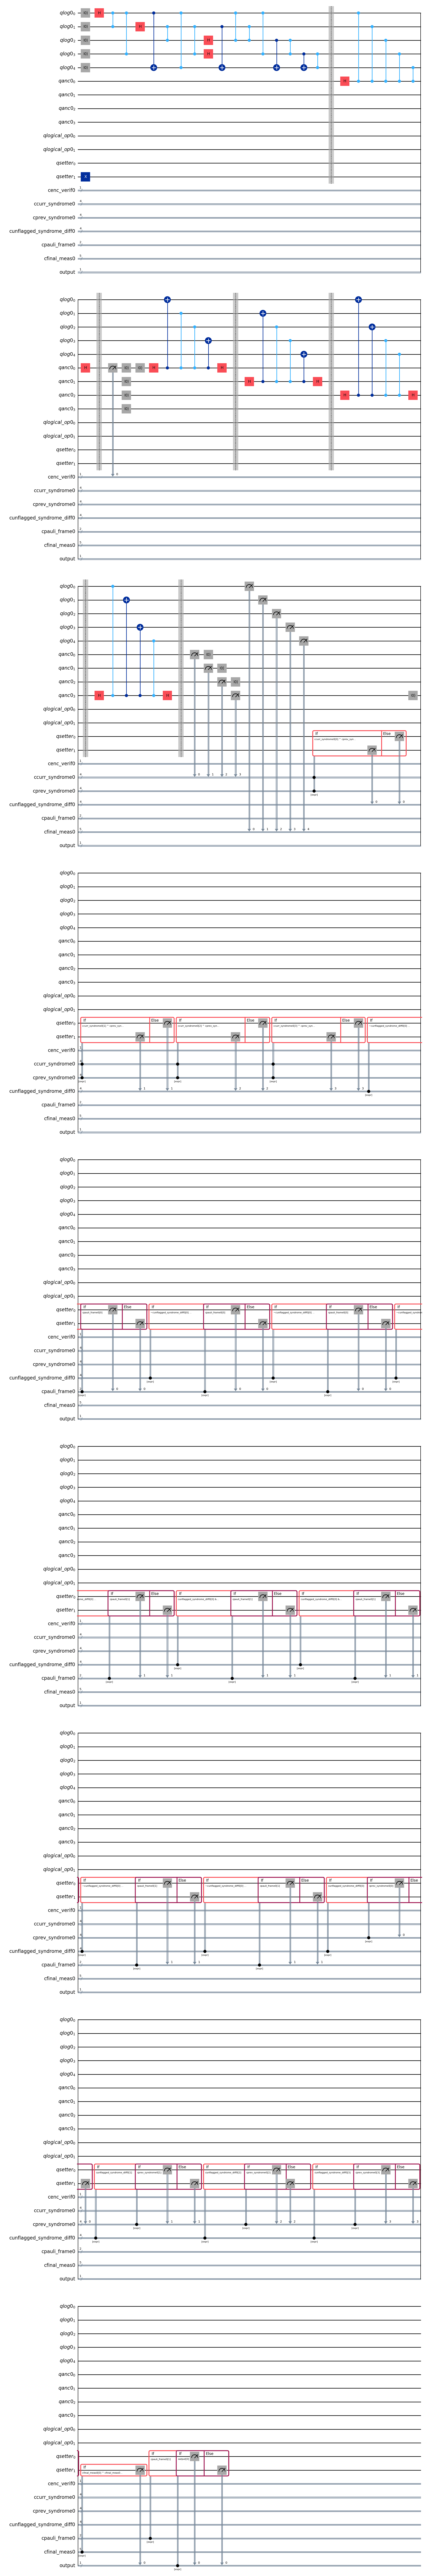

In [20]:
five_qubit_circ = LogicalCircuitGeneral(1, **five_qubit_code)
five_qubit_circ.encode(0, initial_states=[0])
five_qubit_circ.append_qec_cycle([0])
five_qubit_circ.measure([0], [0])
five_qubit_circ.draw('mpl')